In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from statistics import mean, stdev
import time
from math import ceil

# data partition
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

# metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Kfold
from sklearn.model_selection import StratifiedKFold

# scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [73]:
# open the train dataset
df = pd.read_csv('data/train.csv')
df.head(3)

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


In [74]:
# set the index as the Access_ID
df.set_index('Access_ID', inplace = True)
df.head(3)

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        9999 non-null   object 
 1   AccountMng_Pages            9999 non-null   int64  
 2   AccountMng_Duration         9999 non-null   float64
 3   FAQ_Pages                   9999 non-null   int64  
 4   FAQ_Duration                9999 non-null   float64
 5   Product_Pages               9999 non-null   int64  
 6   Product_Duration            9999 non-null   float64
 7   GoogleAnalytics_BounceRate  9999 non-null   float64
 8   GoogleAnalytics_ExitRate    9999 non-null   float64
 9   GoogleAnalytics_PageValue   9999 non-null   float64
 10  OS                          9999 non-null   object 
 11  Browser                     9999 non-null   int64  
 12  Country                     9999 non-null   object 
 13  Type_of_Traffic     

In [76]:
# data types transformation
# Converting Date type from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,9999.0,2.324232,3.340676,0.0,0.0000,1.0000,4.00000,27.0000
AccountMng_Duration,9999.0,81.205854,179.715545,0.0,0.0000,7.5000,92.20835,3398.7500
FAQ_Pages,9999.0,0.508051,1.279390,0.0,0.0000,0.0000,0.00000,24.0000
FAQ_Duration,9999.0,34.559101,139.796989,0.0,0.0000,0.0000,0.00000,2549.3750
Product_Pages,9999.0,31.685869,44.550277,0.0,7.0000,18.0000,38.00000,705.0000
Product_Duration,9999.0,1199.769430,1958.276304,0.0,183.5625,599.0000,1470.27080,63973.5222
GoogleAnalytics_BounceRate,9999.0,0.022305,0.048776,0.0,0.0000,0.0032,0.01680,0.2000
GoogleAnalytics_ExitRate,9999.0,0.043181,0.048845,0.0,0.0143,0.0251,0.05000,0.2000
GoogleAnalytics_PageValue,9999.0,5.963120,18.753626,0.0,0.0000,0.0000,0.00000,361.7637
Browser,9999.0,2.352535,1.715698,1.0,2.0000,2.0000,2.00000,13.0000


#### Observations:
- the dataset don't have null values
- it has outliers in some features - need to explore and solve them
- it has 9.999 observations and 15 features (9 numerical and 6 categorical)
- the dependent variable is 'Buy'

## Split into train and val dataset
- all the preprocessing steps will be do into the train dataset

In [93]:
X = df.drop('Buy', axis=1)
y = df['Buy']

In [94]:
# split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [95]:
X_train.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor'],
      dtype='object')

In [97]:
# Define metric and non-metric features
non_metric_features = ['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']
metric_features = X_train.columns.drop(non_metric_features).to_list()

In [98]:
non_metric_features

['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']

In [99]:
metric_features

['AccountMng_Pages',
 'AccountMng_Duration',
 'FAQ_Pages',
 'FAQ_Duration',
 'Product_Pages',
 'Product_Duration',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue']

## Preprocessing

- Outliers

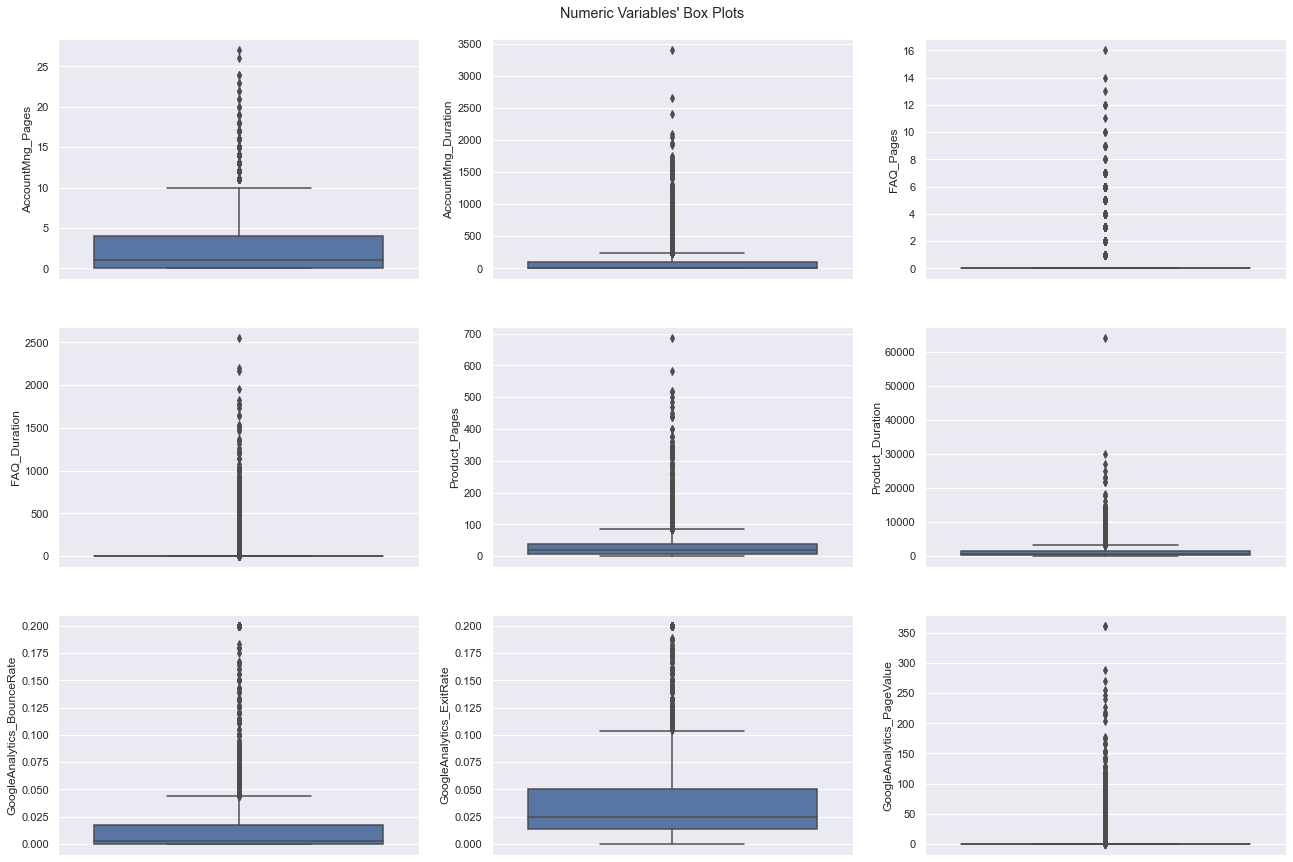

In [100]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], ax=ax)
    #ax.set_title(feat, y=-0.16)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

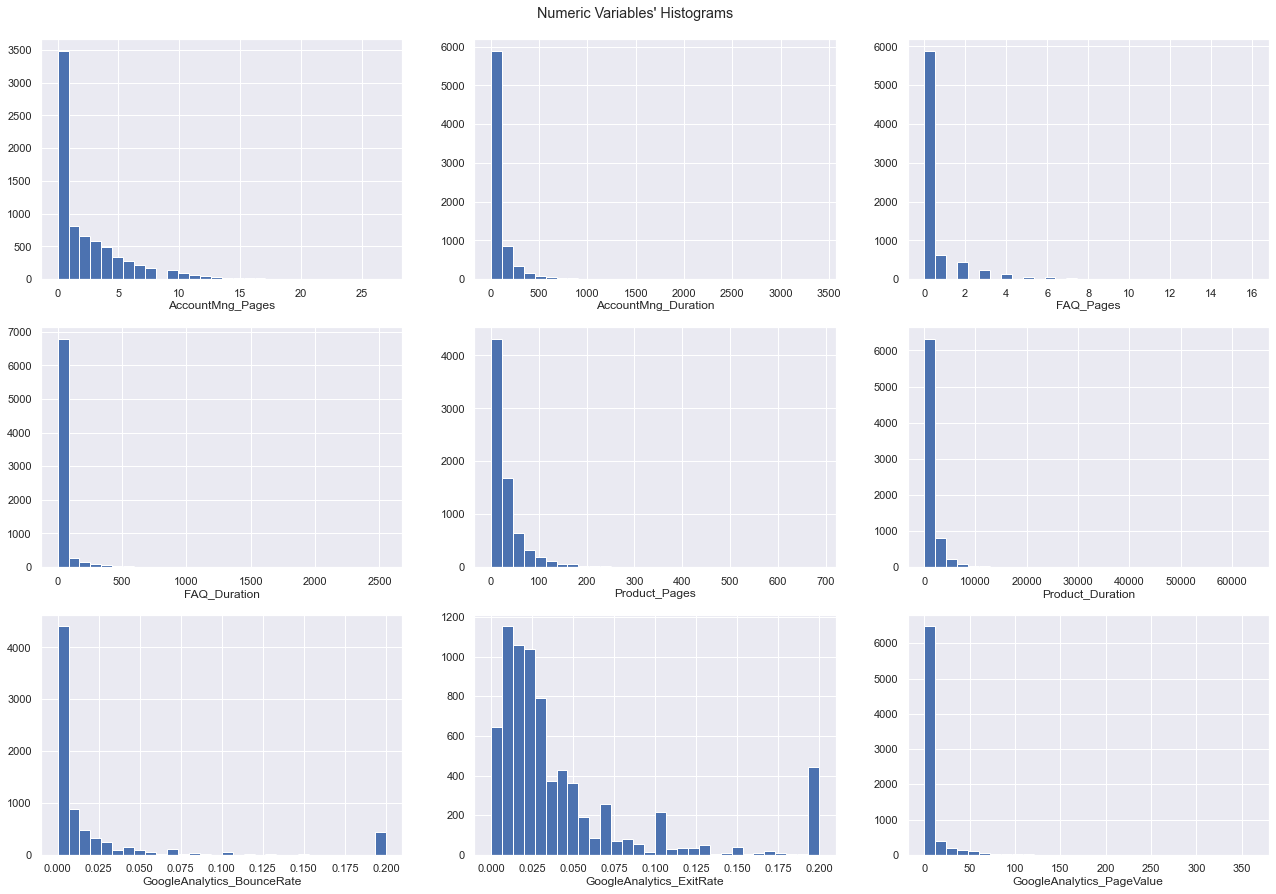

In [101]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(X_train[feat], bins=30)
    ax.set_title(feat, y=-0.15)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

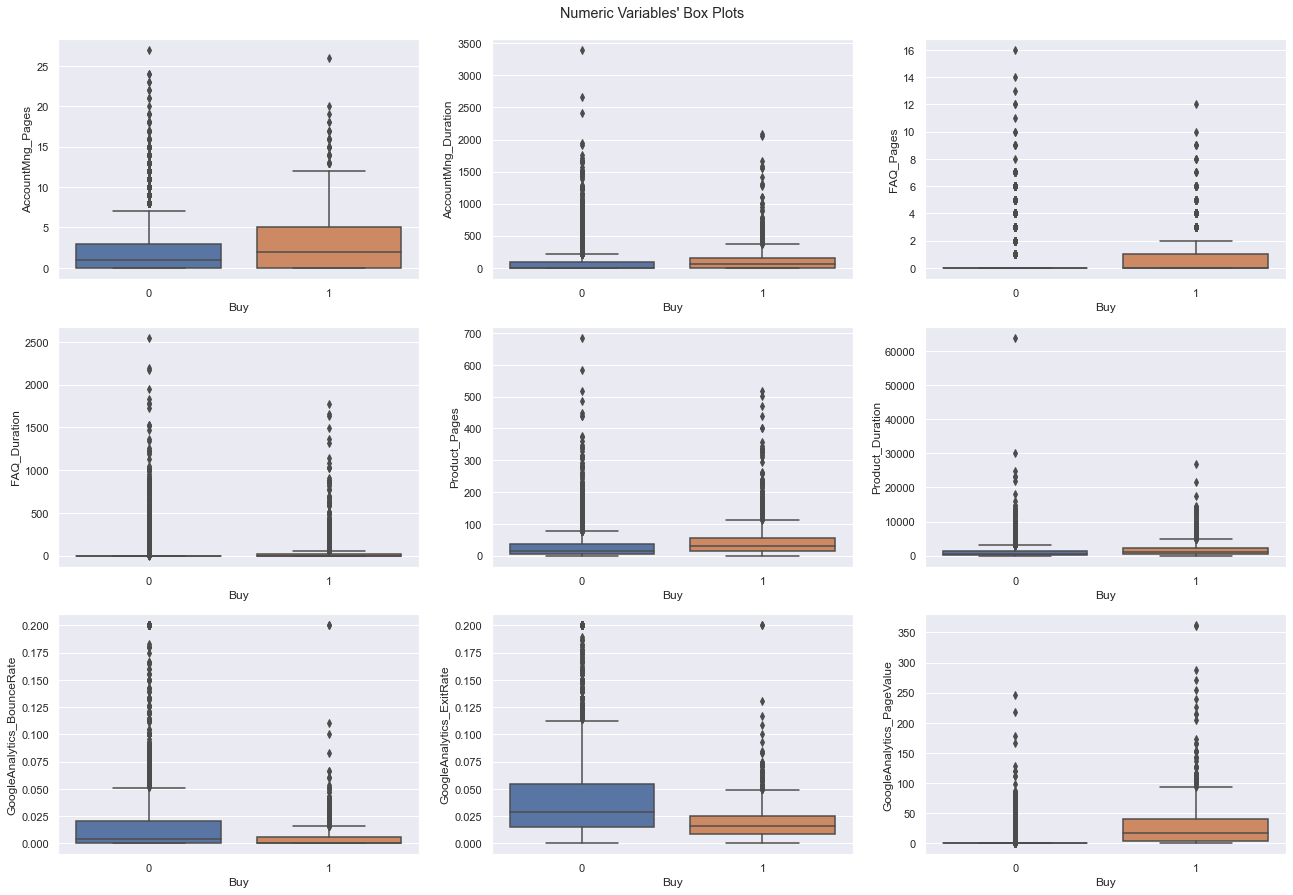

In [103]:
# All Numeric Variables' Box Plots in one figure - with the dependent variable
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], x=y_train, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

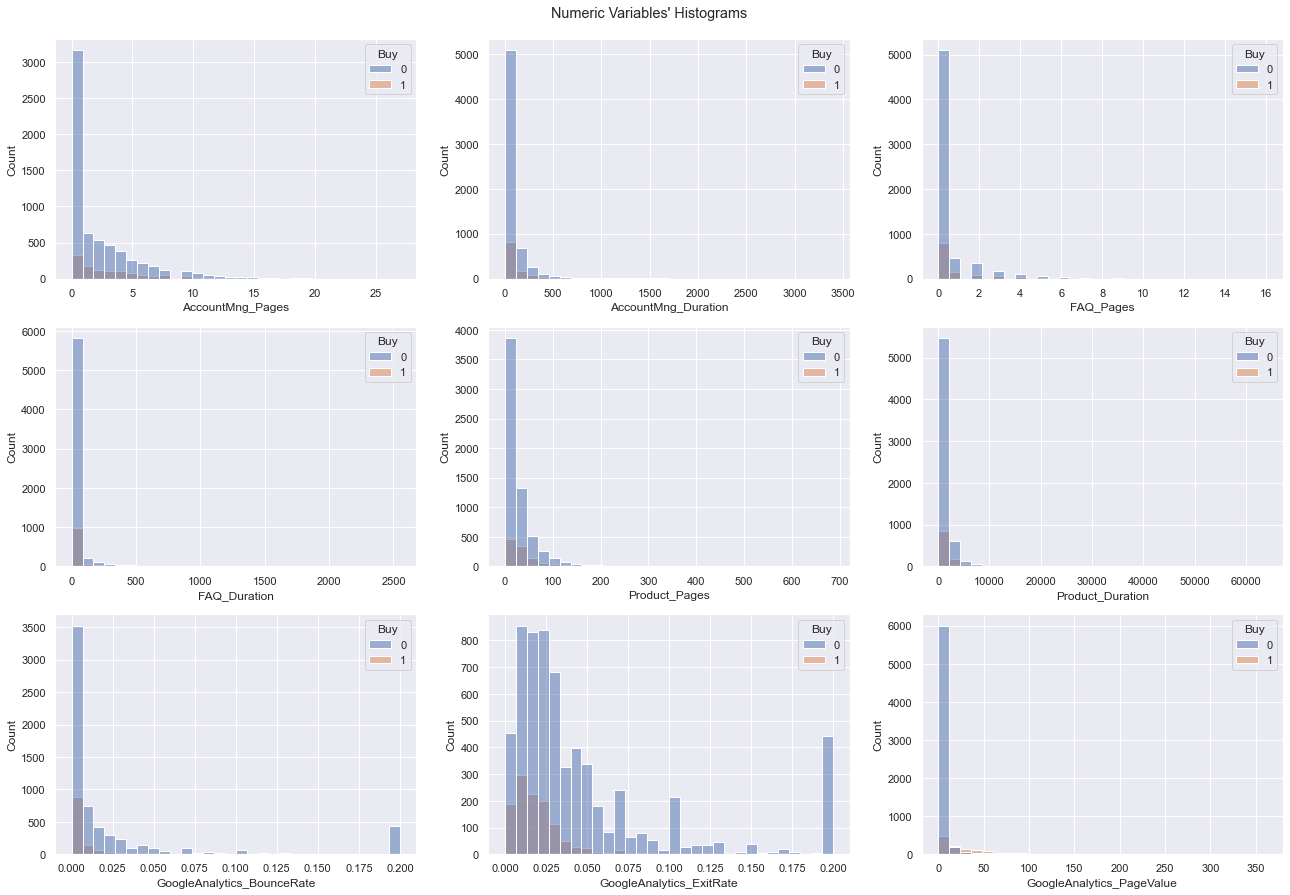

In [104]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(data=X_train, x=feat, hue=y_train, ax=ax, bins=30)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

Observations:
- the dataset has outliers in all of the numeric features
- the data is right skewed in all of the numeric features, there is a lot of zero values in all features except in 'GoogleAnalytics_ExitRate'
- the distribution of the observations that didn't buy the products is very similar to those that bought the product. This means that it can be difficult to the model to learn the differences of these two groups

In [105]:
# Define trashold for outliers - conservative method

filters1 = (
    (X_train['AccountMng_Duration']<=2000)
    &
    (X_train['FAQ_Duration']<=2000)
    &
    (X_train['Product_Pages']<=650)
    &
    (X_train['Product_Duration']<=50000)
    &
    (X_train['GoogleAnalytics_PageValue']<=350)
)

train_concat = pd.concat([X_train, y_train], axis=1)

df_1 = train_concat[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / train_concat.shape[0], 4))

train_concat = train_concat[filters1]

Percentage of data kept after removing outliers: 0.9987


In [107]:
X_train = train_concat.drop('Buy', axis=1)
y_train = train_concat['Buy']

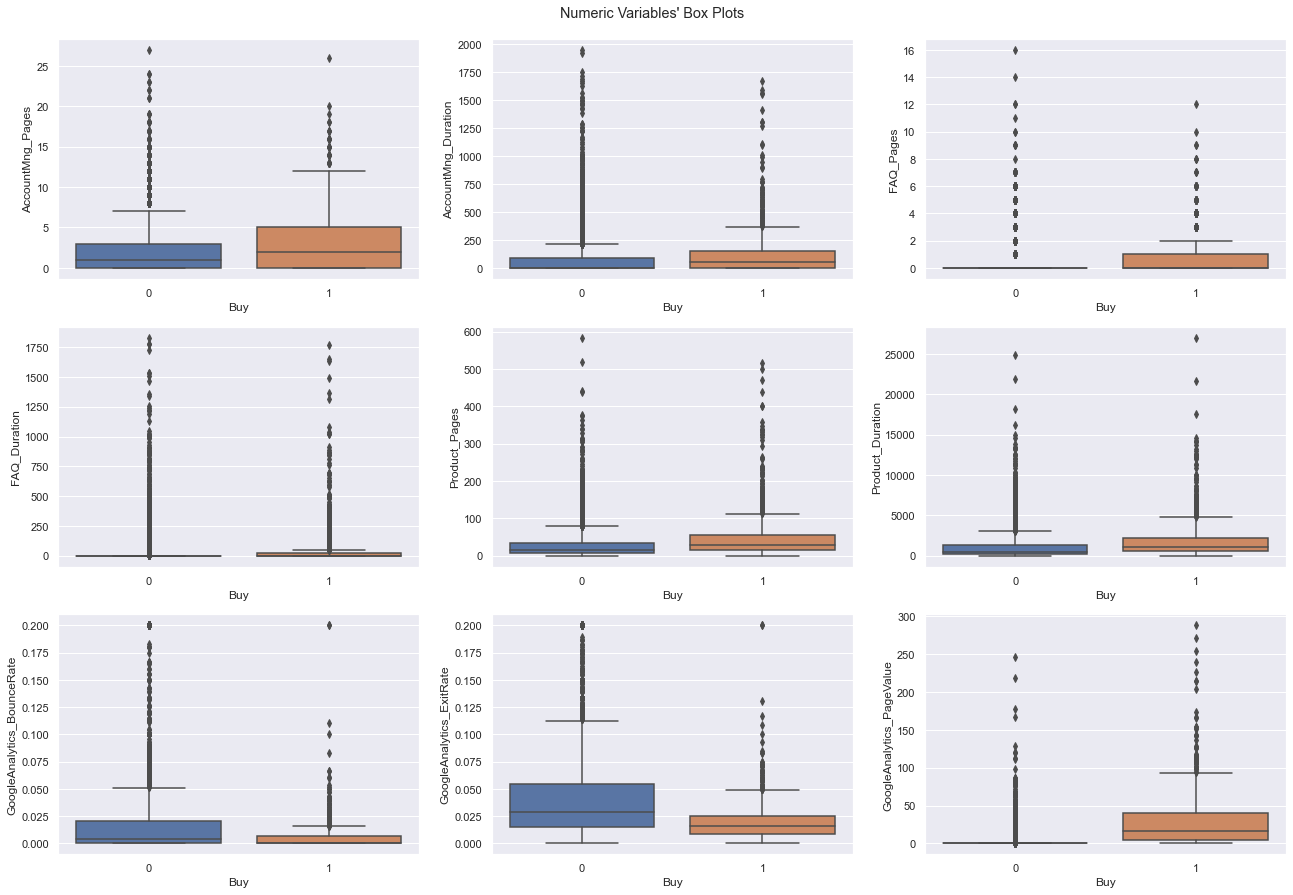

In [109]:
# After outliers removal
# All Numeric Variables' Box Plots in one figure - with the dependent variable
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], x=y_train, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

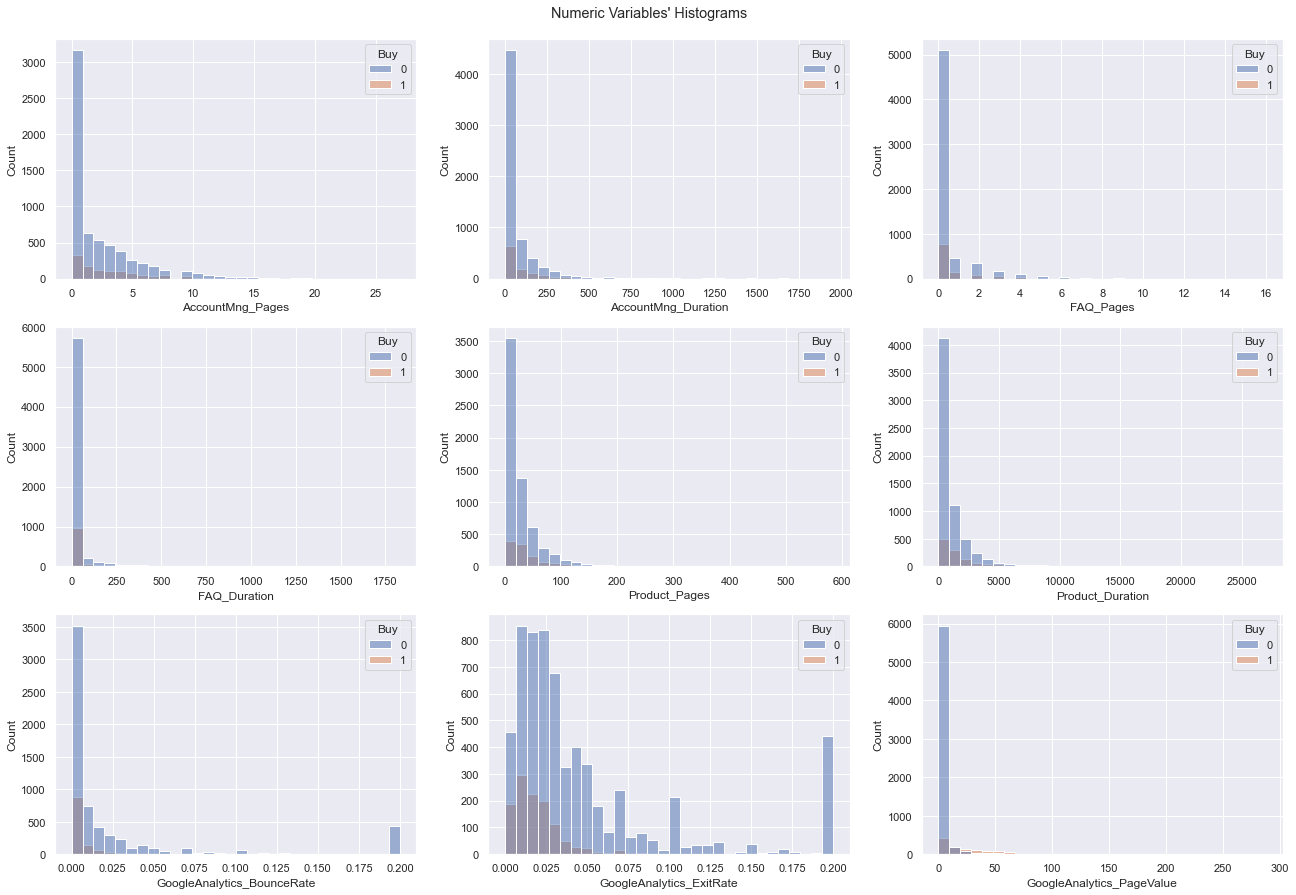

In [110]:
# After outliers removal
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(data=X_train, x=feat, hue=y_train, ax=ax, bins=30)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

## Feature Selection

- Correlation

In [111]:
# define the fuction for correlation's heatmap 
def cor_heatmap(cor, ax):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1', ax=ax)
    plt.show()

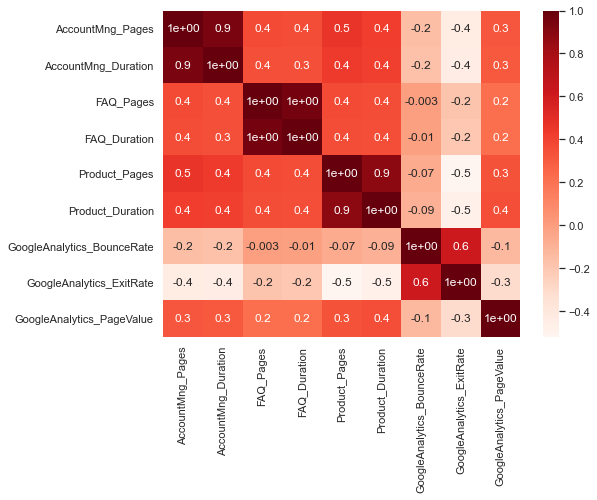

<Figure size 864x720 with 0 Axes>

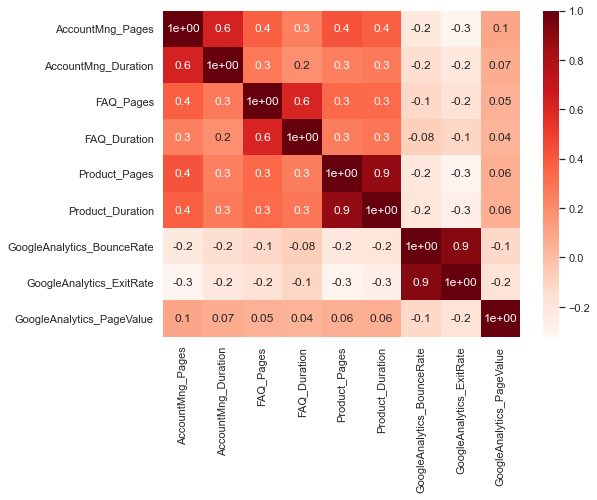

<Figure size 864x720 with 0 Axes>

In [112]:
#build correlation matrix
# method - pearson - feature and target/ linear relation
cor_pearson = X_train[metric_features].corr(method='pearson')

# method - spearman - rank correlation, ordering/ not linear relation
cor_spearman = X_train[metric_features].corr(method ='spearman')

# plot the correlations
fig, ax1 = plt.subplots(1,1, figsize=(8,6))
cor_heatmap(cor_spearman, ax1)

fig, ax1 = plt.subplots(1,1, figsize=(8,6))
cor_heatmap(cor_pearson, ax1)

Observations:
- Features highly correlated (keep only one):
    - __'AccountMng_Pages'__ and __'AccountMng_Duration'__ (Number of pages visited and total amount of time spent by the user - account management related pages)
    - __'FAQ_Pages'__ and __'FAQ_Duration'__ (Number of pages visited and total amount of time spent by the user - FAQ related pages)
    - __'Product_Pages'__ and __'Product_Duration'__ (Number of pages visited and total amount of time spent by the user - Product related pages)
    - __'GoogleAnalytics_BounceRate'__ and __'GoogleAnalytics_ExitRate'__ (Bounce and exit rate, both explains the the exit rate of the pages visited by the user)

In [113]:
X_train.drop(['AccountMng_Duration', 'FAQ_Duration', 'Product_Duration', 'GoogleAnalytics_ExitRate'], axis=1, inplace=True)

In [114]:
X_train.columns

Index(['Date', 'AccountMng_Pages', 'FAQ_Pages', 'Product_Pages',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_PageValue', 'OS',
       'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor'],
      dtype='object')

In [116]:
# define new metric and non-metric features
# Define metric and non-metric features
non_metric_features = ['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']
metric_features = X_train.columns.drop(non_metric_features).to_list()

- Scale numeric values

In [117]:
# Separate metric and non-metric features before scaling
# Train dataset
X_train_num = X_train[metric_features]
X_train_cat = X_train[non_metric_features]

# Validation dataset
X_val_num = X_val[metric_features]
X_val_cat = X_val[non_metric_features]

In [118]:
# Power Transformation - this one was the better transformation method{‘yeo-johnson’},
# "A power transform will make the probability distribution of a variable more Gaussian."
# "This is often described as removing a skew in the distribution, stabilizing the variance of the distribution."

power = PowerTransformer().fit(X_train_num)

X_train_num_power = power.transform(X_train_num)
# Convert the array to a pandas dataframe
X_train_num_power = pd.DataFrame(X_train_num_power, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_power.head(3)

,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_PageValue
Access_ID,,,,,
708079592,0.834211,-0.522127,1.451751,-0.798198,-0.532968
426312699,0.551204,1.812977,0.127755,-0.798198,-0.532968
156527868,-0.994652,-0.522127,0.560716,-0.798198,-0.532968


In [138]:
# transform validaton dataset
X_val_num_power = power.transform(X_val_num)
# Convert the array to a pandas dataframe
X_val_num_power = pd.DataFrame(X_val_num_power, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_power.head(3)

,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_PageValue
Access_ID,,,,,
247273702,0.076531,-0.522127,0.586932,-0.798198,-0.532968
373594901,-0.994652,-0.522127,-0.009645,-0.798198,-0.532968
273153081,1.027367,-0.522127,0.612429,-0.798198,-0.532968


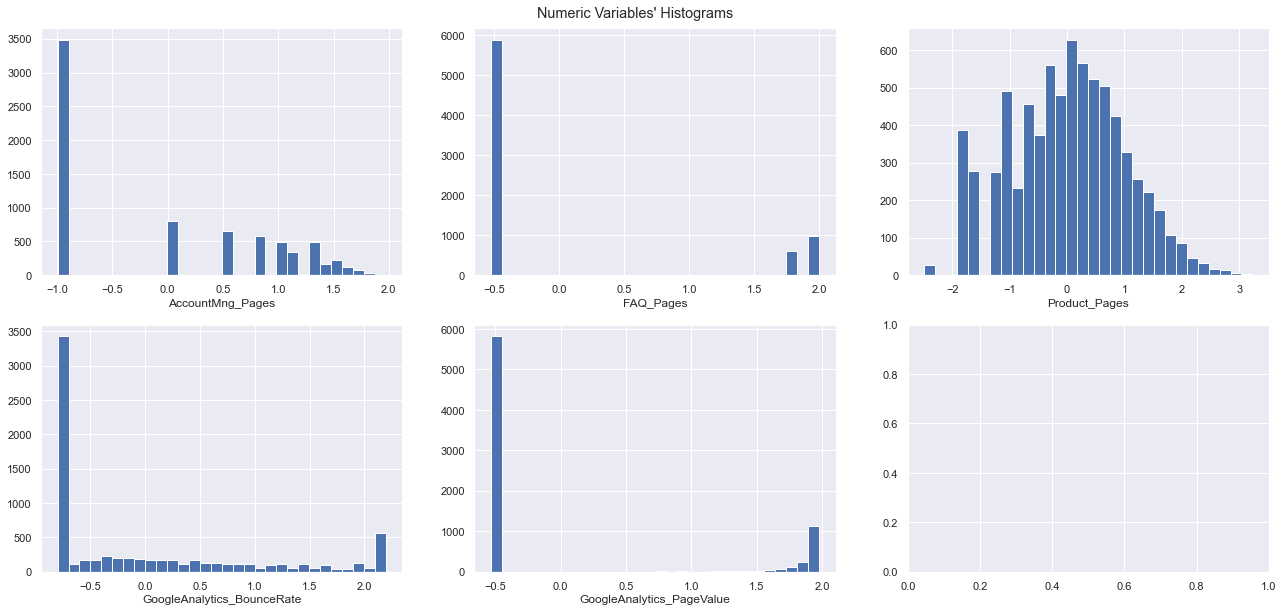

In [122]:
# After Power Transformation
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(22, 10))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(X_train_num_power[feat], bins=30)
    ax.set_title(feat, y=-0.15)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

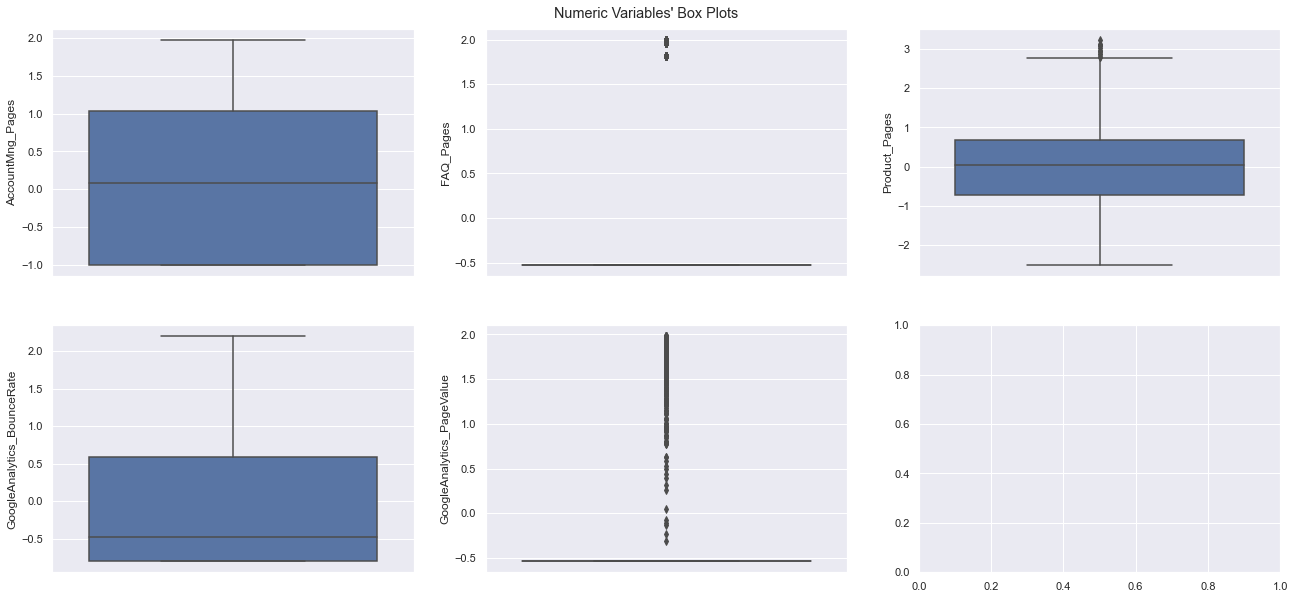

In [124]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(22, 10))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train_num_power[feat], ax=ax)
    #ax.set_title(feat, y=-0.16)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

- Chi-Square for categorical data

In [183]:
df['Buy'].value_counts()

0    8447
1    1552
Name: Buy, dtype: int64

In [125]:
# define the function to verufy if there is an association between categorical variables
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [130]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Date is IMPORTANT for Prediction
OS is IMPORTANT for Prediction
Browser is IMPORTANT for Prediction
Country is NOT an important predictor. (Discard Country from model)
Type_of_Traffic is IMPORTANT for Prediction
Type_of_Visitor is IMPORTANT for Prediction


In [135]:
# concat numeric and categorical data after Power Transformation - train dataset
X_train_power = pd.concat([X_train_num_power, X_train_cat], axis=1)
X_train_power.head(3)

,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_PageValue,Date,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
Access_ID,,,,,,,,,,,
708079592,0.834211,-0.522127,1.451751,-0.798198,-0.532968,2020-11-06,Windows,2,Spain,2,New_Access
426312699,0.551204,1.812977,0.127755,-0.798198,-0.532968,2020-03-26,MacOSX,2,Spain,1,Returner
156527868,-0.994652,-0.522127,0.560716,-0.798198,-0.532968,2020-11-24,Windows,2,United Kingdom,2,Returner


In [137]:
# drop Country and Date from categorical features
X_train_power.drop(['Date', 'Country'], axis=1, inplace=True)
X_train_power.head(3)

,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_PageValue,OS,Browser,Type_of_Traffic,Type_of_Visitor
Access_ID,,,,,,,,,
708079592,0.834211,-0.522127,1.451751,-0.798198,-0.532968,Windows,2,2,New_Access
426312699,0.551204,1.812977,0.127755,-0.798198,-0.532968,MacOSX,2,1,Returner
156527868,-0.994652,-0.522127,0.560716,-0.798198,-0.532968,Windows,2,2,Returner


In [139]:
# concat numeric and categorical data after Power Transformation - val dataset
X_val_power = pd.concat([X_val_num_power, X_val_cat], axis=1)
X_val_power.head(3)

# drop Country and Date from categorical features
X_val_power.drop(['Date', 'Country'], axis=1, inplace=True)
X_val_power.head(3)

,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_PageValue,OS,Browser,Type_of_Traffic,Type_of_Visitor
Access_ID,,,,,,,,,
247273702,0.076531,-0.522127,0.586932,-0.798198,-0.532968,Android,1,2,Returner
373594901,-0.994652,-0.522127,-0.009645,-0.798198,-0.532968,Windows,2,2,New_Access
273153081,1.027367,-0.522127,0.612429,-0.798198,-0.532968,Windows,2,2,New_Access


In [140]:
X_train_power.shape

(7489, 9)

In [141]:
X_val_power.shape

(2500, 9)

- Create dummy variables

In [144]:
# create dummy variables - 'OS', 'Browser', 'Type_of_Traffic', 'Type_of_Visitor' - Train Dataset

# 'OS'
X_train_power = pd.get_dummies(X_train_power, columns = ['OS'], drop_first=True)

# 'Browser'
X_train_power = pd.get_dummies(X_train_power, columns = ['Browser'], drop_first=True)

# 'Type_of_Traffic'
X_train_power = pd.get_dummies(X_train_power, columns = ['Type_of_Traffic'], drop_first=True)

# 'Type_of_Visitor'
X_train_power = pd.get_dummies(X_train_power, columns = ['Type_of_Visitor'], drop_first=True)

In [145]:
X_train_power

,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_PageValue,OS_Chrome OS,OS_Fedora,OS_MacOSX,OS_Other,OS_Ubuntu,...,Type_of_Traffic_8,Type_of_Traffic_9,Type_of_Traffic_10,Type_of_Traffic_11,Type_of_Traffic_12,Type_of_Traffic_13,Type_of_Traffic_14,Type_of_Traffic_15,Type_of_Visitor_Other,Type_of_Visitor_Returner
Access_ID,,,,,,,,,,,,,,,,,,,,,
708079592,0.834211,-0.522127,1.451751,-0.798198,-0.532968,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426312699,0.551204,1.812977,0.127755,-0.798198,-0.532968,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
156527868,-0.994652,-0.522127,0.560716,-0.798198,-0.532968,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414839270,0.076531,1.812977,0.447739,-0.798198,-0.532968,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
569787208,-0.994652,-0.522127,0.319011,1.241913,-0.532968,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177520994,-0.994652,-0.522127,0.084208,-0.798198,-0.532968,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
599953664,0.076531,-0.522127,0.319011,-0.798198,-0.532968,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
209148521,-0.994652,-0.522127,0.169325,-0.798198,1.972743,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [146]:
# create dummy variables - 'OS', 'Browser', 'Type_of_Traffic', 'Type_of_Visitor' - Val Dataset

# 'OS'
X_val_power = pd.get_dummies(X_val_power, columns = ['OS'], drop_first=True)

# 'Browser'
X_val_power = pd.get_dummies(X_val_power, columns = ['Browser'], drop_first=True)

# 'Type_of_Traffic'
X_val_power = pd.get_dummies(X_val_power, columns = ['Type_of_Traffic'], drop_first=True)

# 'Type_of_Visitor'
X_val_power = pd.get_dummies(X_val_power, columns = ['Type_of_Visitor'], drop_first=True)

X_val_power

,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_PageValue,OS_Chrome OS,OS_Fedora,OS_MacOSX,OS_Ubuntu,OS_Windows,...,Type_of_Traffic_8,Type_of_Traffic_9,Type_of_Traffic_10,Type_of_Traffic_11,Type_of_Traffic_12,Type_of_Traffic_13,Type_of_Traffic_14,Type_of_Traffic_15,Type_of_Visitor_Other,Type_of_Visitor_Returner
Access_ID,,,,,,,,,,,,,,,,,,,,,
247273702,0.076531,-0.522127,0.586932,-0.798198,-0.532968,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
373594901,-0.994652,-0.522127,-0.009645,-0.798198,-0.532968,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
273153081,1.027367,-0.522127,0.612429,-0.798198,-0.532968,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
229496954,1.169962,-0.522127,0.815033,0.308658,-0.532968,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
131659445,-0.994652,-0.522127,-1.910736,2.195156,-0.532968,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604732978,-0.994652,-0.522127,-1.130813,-0.798198,-0.532968,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
147060317,1.686023,1.812977,1.934453,-0.787357,1.308284,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
594337849,0.834211,-0.522127,-1.567852,-0.798198,-0.532968,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [147]:
X_val_power.columns

Index(['AccountMng_Pages', 'FAQ_Pages', 'Product_Pages',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_PageValue',
       'OS_Chrome OS', 'OS_Fedora', 'OS_MacOSX', 'OS_Ubuntu', 'OS_Windows',
       'OS_iOS', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Type_of_Traffic_2', 'Type_of_Traffic_3',
       'Type_of_Traffic_4', 'Type_of_Traffic_5', 'Type_of_Traffic_6',
       'Type_of_Traffic_7', 'Type_of_Traffic_8', 'Type_of_Traffic_9',
       'Type_of_Traffic_10', 'Type_of_Traffic_11', 'Type_of_Traffic_12',
       'Type_of_Traffic_13', 'Type_of_Traffic_14', 'Type_of_Traffic_15',
       'Type_of_Visitor_Other', 'Type_of_Visitor_Returner'],
      dtype='object')

In [149]:
X_train_power.columns

Index(['AccountMng_Pages', 'FAQ_Pages', 'Product_Pages',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_PageValue',
       'OS_Chrome OS', 'OS_Fedora', 'OS_MacOSX', 'OS_Other', 'OS_Ubuntu',
       'OS_Windows', 'OS_iOS', 'Browser_2', 'Browser_3', 'Browser_4',
       'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13', 'Type_of_Traffic_2',
       'Type_of_Traffic_3', 'Type_of_Traffic_4', 'Type_of_Traffic_5',
       'Type_of_Traffic_6', 'Type_of_Traffic_7', 'Type_of_Traffic_8',
       'Type_of_Traffic_9', 'Type_of_Traffic_10', 'Type_of_Traffic_11',
       'Type_of_Traffic_12', 'Type_of_Traffic_13', 'Type_of_Traffic_14',
       'Type_of_Traffic_15', 'Type_of_Visitor_Other',
       'Type_of_Visitor_Returner'],
      dtype='object')

In [150]:
# create a column with zeros on 'OS_Other'
X_val_power['OS_Other'] = 0

In [151]:
X_val_power

,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_BounceRate,GoogleAnalytics_PageValue,OS_Chrome OS,OS_Fedora,OS_MacOSX,OS_Ubuntu,OS_Windows,...,Type_of_Traffic_9,Type_of_Traffic_10,Type_of_Traffic_11,Type_of_Traffic_12,Type_of_Traffic_13,Type_of_Traffic_14,Type_of_Traffic_15,Type_of_Visitor_Other,Type_of_Visitor_Returner,OS_Other
Access_ID,,,,,,,,,,,,,,,,,,,,,
247273702,0.076531,-0.522127,0.586932,-0.798198,-0.532968,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
373594901,-0.994652,-0.522127,-0.009645,-0.798198,-0.532968,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
273153081,1.027367,-0.522127,0.612429,-0.798198,-0.532968,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
229496954,1.169962,-0.522127,0.815033,0.308658,-0.532968,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
131659445,-0.994652,-0.522127,-1.910736,2.195156,-0.532968,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604732978,-0.994652,-0.522127,-1.130813,-0.798198,-0.532968,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
147060317,1.686023,1.812977,1.934453,-0.787357,1.308284,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
594337849,0.834211,-0.522127,-1.567852,-0.798198,-0.532968,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


- RFE - with f1 score evaluation

In [152]:
#no of features - f1 score evaluation
nof_list=np.arange(1,40)
print(nof_list)
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression(class_weight='balanced')
    rfe = RFE(model, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_power,y_train)
    X_val_rfe = rfe.transform(X_val_power)
    model.fit(X_train_rfe,y_train)
    
    y_pred_val = model.predict(X_val_rfe)
    score = f1_score(y_val, y_pred_val)
    score_list.append(score)
    print('number of features:', nof_list[n], '--- score:', score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print('----------------')
print("Optimum number of features: %d" %nof)
print("F1 Score with %d features: %f" % (nof, high_score))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
number of features: 1 --- score: 0.6517094017094016
number of features: 2 --- score: 0.6531049250535331
number of features: 3 --- score: 0.6531049250535331
number of features: 4 --- score: 0.6531049250535331
number of features: 5 --- score: 0.648936170212766
number of features: 6 --- score: 0.6496272630457934
number of features: 7 --- score: 0.6496272630457934
number of features: 8 --- score: 0.648936170212766
number of features: 9 --- score: 0.6474973375931842
number of features: 10 --- score: 0.6475583864118896
number of features: 11 --- score: 0.6494623655913978
number of features: 12 --- score: 0.6487068965517242
number of features: 13 --- score: 0.6472491909385113
number of features: 14 --- score: 0.6472491909385113
number of features: 15 --- score: 0.6472491909385113
number of features: 16 --- score: 0.6509635974304068
number of features: 17 --- score: 0.6495176

In [154]:
#no of features - Score evaluation
nof_list=np.arange(1,40)
print(nof_list)
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression(class_weight='balanced')
    rfe = RFE(model, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_power,y_train)
    X_val_rfe = rfe.transform(X_val_power)
    model.fit(X_train_rfe,y_train)
    
    y_pred_val = model.predict(X_val_rfe)
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    print('number of features:', nof_list[n], '--- score:', score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print('----------------')
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
number of features: 1 --- score: 0.8696
number of features: 2 --- score: 0.8704
number of features: 3 --- score: 0.8704
number of features: 4 --- score: 0.8704
number of features: 5 --- score: 0.868
number of features: 6 --- score: 0.8684
number of features: 7 --- score: 0.8684
number of features: 8 --- score: 0.868
number of features: 9 --- score: 0.8676
number of features: 10 --- score: 0.8672
number of features: 11 --- score: 0.8696
number of features: 12 --- score: 0.8696
number of features: 13 --- score: 0.8692
number of features: 14 --- score: 0.8692
number of features: 15 --- score: 0.8692
number of features: 16 --- score: 0.8696
number of features: 17 --- score: 0.8692
number of features: 18 --- score: 0.8692
number of features: 19 --- score: 0.87
number of features: 20 --- score: 0.87
number of features: 21 --- score: 0.8708
number of features: 22 --- score: 

In [184]:
model = LogisticRegression(class_weight='balanced')
rfe = RFE(estimator=model, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train_power,y_train)


rfe_df = pd.DataFrame()
rfe_df['columns'] = list(X_train_power.columns)
rfe_df['ranking'] = rfe.ranking_
rfe_df['support'] = rfe.support_

rfe_df.sort_values(by='ranking')

# print(list(X_train_power.columns))
# print(rfe.ranking_)
# print(list(rfe.support_))

,columns,ranking,support
33,Type_of_Traffic_12,1,True
4,GoogleAnalytics_PageValue,1,True
29,Type_of_Traffic_8,2,False
8,OS_Other,3,False
21,Browser_12,4,False
13,Browser_3,5,False
32,Type_of_Traffic_11,6,False
36,Type_of_Traffic_15,7,False
23,Type_of_Traffic_2,8,False
9,OS_Ubuntu,9,False


- Lasso Regression

In [170]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

Lasso picked 5 variables and eliminated the other 0 variables


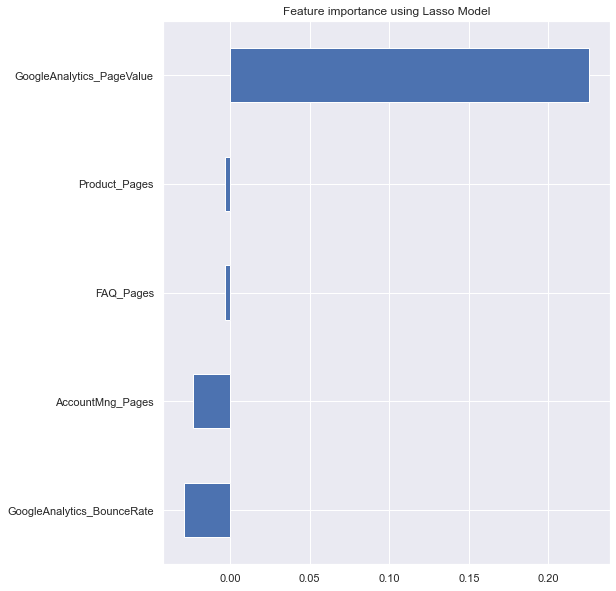

In [173]:
reg = LassoCV()

reg.fit(X_train_num_power, y_train)
coef = pd.Series(reg.coef_, index = X_train_num_power.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
plot_importance(coef,'Lasso')

In [176]:
X_train_model = X_train_power[['GoogleAnalytics_BounceRate', 'GoogleAnalytics_PageValue', 'Type_of_Traffic_12', 'Type_of_Visitor_Returner']]
X_val_model = X_val_power[['GoogleAnalytics_BounceRate', 'GoogleAnalytics_PageValue', 'Type_of_Traffic_12', 'Type_of_Visitor_Returner']]

# Create Model
model_log = LogisticRegression(class_weight='balanced').fit(X_train_model, y_train)

y_pred_train = model_log.predict(X_train_model)
y_pred_val = model_log.predict(X_val_model)

# evaluation:
print('f1_train:', f1_score(y_train, y_pred_train))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.6645367412140575
f1_val: 0.6524064171122994


In [201]:
X_train_model = X_train_power[['GoogleAnalytics_PageValue', 'Type_of_Traffic_12']]
X_val_model = X_val_power[['GoogleAnalytics_PageValue', 'Type_of_Traffic_12']]

# Create Model
model_log = LogisticRegression(class_weight='balanced').fit(X_train_model, y_train)

y_pred_train = model_log.predict(X_train_model)
y_pred_val = model_log.predict(X_val_model)

cm = confusion_matrix(y_val, y_pred_val)

# evaluation:
print(confusion_matrix(y_val, y_pred_val))
print('f1_train:', f1_score(y_train, y_pred_train))
print('f1_val:', f1_score(y_val, y_pred_val))

[[1869  243]
 [  83  305]]
f1_train: 0.663359319631467
f1_val: 0.6517094017094016


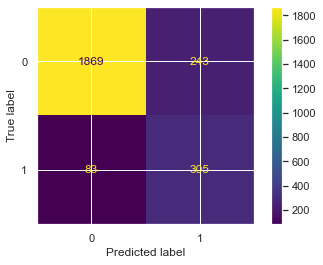

In [194]:
sns.set_style('darkgrid')
cm_display = ConfusionMatrixDisplay(cm).plot()

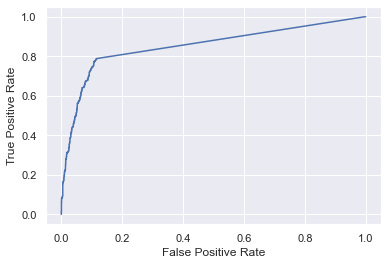

In [196]:
y_score = model_log.decision_function(X_val_model)

fpr, tpr, _ = roc_curve(y_val, y_score, pos_label=model_log.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

[[1865  247]
 [  82  306]]
precision: 0.5533453887884268
f1_val: 0.6503719447396386


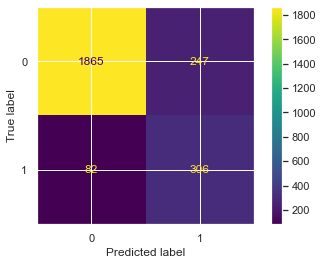

In [212]:
#low precision can be improved by increasing your threshold, making your model less sensitive
y_pred_new_threshold = (model_log.predict_proba(X_val_model)[:,1] > 0.2).astype(int)
y_pred_new_threshold

print(confusion_matrix(y_val, y_pred_new_threshold))
print('precision:', precision_score(y_val, y_pred_new_threshold))
print('f1_val:', f1_score(y_val, y_pred_new_threshold))

cm = confusion_matrix(y_val, y_pred_new_threshold)
cm_display = ConfusionMatrixDisplay(cm).plot()

- Oversampling

In [177]:
ros = RandomOverSampler(random_state=0)
X_train_power_over, y_train_over = ros.fit_resample(X_train_power, y_train)

In [180]:
X_train_model = X_train_power_over[['GoogleAnalytics_BounceRate', 'GoogleAnalytics_PageValue', 'Type_of_Traffic_12', 'Type_of_Visitor_Returner']]
X_val_model = X_val_power[['GoogleAnalytics_BounceRate', 'GoogleAnalytics_PageValue', 'Type_of_Traffic_12', 'Type_of_Visitor_Returner']]

# Create Model
model_log = LogisticRegression(class_weight='balanced').fit(X_train_model, y_train_over)

y_pred_train = model_log.predict(X_train_model)
y_pred_val = model_log.predict(X_val_model)

# evaluation:
print('f1_train:', f1_score(y_train_over, y_pred_train))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.8396971691902567
f1_val: 0.6524064171122994


In [182]:
X_train_model = X_train_power_over[['GoogleAnalytics_PageValue', 'Type_of_Traffic_12']]
X_val_model = X_val_power[['GoogleAnalytics_PageValue', 'Type_of_Traffic_12']]

# Create Model
model_log = LogisticRegression(class_weight='balanced').fit(X_train_model, y_train_over)

y_pred_train = model_log.predict(X_train_model)
y_pred_val = model_log.predict(X_val_model)

cm = confusion_matrix(y_val, y_pred_val)

# evaluation:
print('f1_train:', f1_score(y_train_over, y_pred_train))
print('f1_val:', f1_score(y_val, y_pred_val))

f1_train: 0.8393518137698445
f1_val: 0.6517094017094016
